In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

input_annotation_file = 'data/pop_norms.csv'
df = pd.read_csv(input_annotation_file, header=0)

In [2]:
# CSA and TM correlations
from scipy.stats import pearsonr

#df=df[df["TMT PRED AVG"]<20]

corr, _ = pearsonr(df['TMT PRED AVG filtered'], df['CSA PRED AVG w line'])
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df['TMT PRED AVG filtered'], df['TMT PRED AVG 90 filtered'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
corr, _ = spearmanr(df['TMT PRED AVG filtered'], df['CSA PRED AVG w line'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.903
Pearsons correlation: 0.989
Spearmans correlation: 0.915


In [3]:
df.loc[df.Age > 30, 'Age'] = 30

## 1. Gender 

In [ ]:
#plot general
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
df['Sex'] = df['Gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Age", y="TMT PRED AVG", hue="Sex", data=df, 
            showfliers=False,
            palette="colorblind", width=0.5).set_title("Biological gender wrt TMT n="+str(df.shape[0]))
plt.savefig('data/abcd_plots/gender.png', dpi=300)

In [ ]:
#plot general
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
df['Sex'] = df['Gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Sex", data=df,  
            showfliers=False,
            palette="colorblind", width=0.5).set_title("Biological gender wrt TMT n="+str(df.shape[0]))
plt.savefig('data/abcd_plots/gender.png', dpi=300)

In [ ]:
sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
df['Sex'] = df['Gender'].map({2:'Female',1:'Male'})

sns.countplot(data=df, x="Age", hue="Sex",palette="colorblind")
plt.yticks(range(0,3200,100))


## 2. Hormone Saliva Tests

### Option 2.1 Generate data

### Option 2.2 Read data

In [4]:
df_hrm = pd.read_csv("data/ABCD-studies/abcd_hsss01.csv", header=0)

### Plot

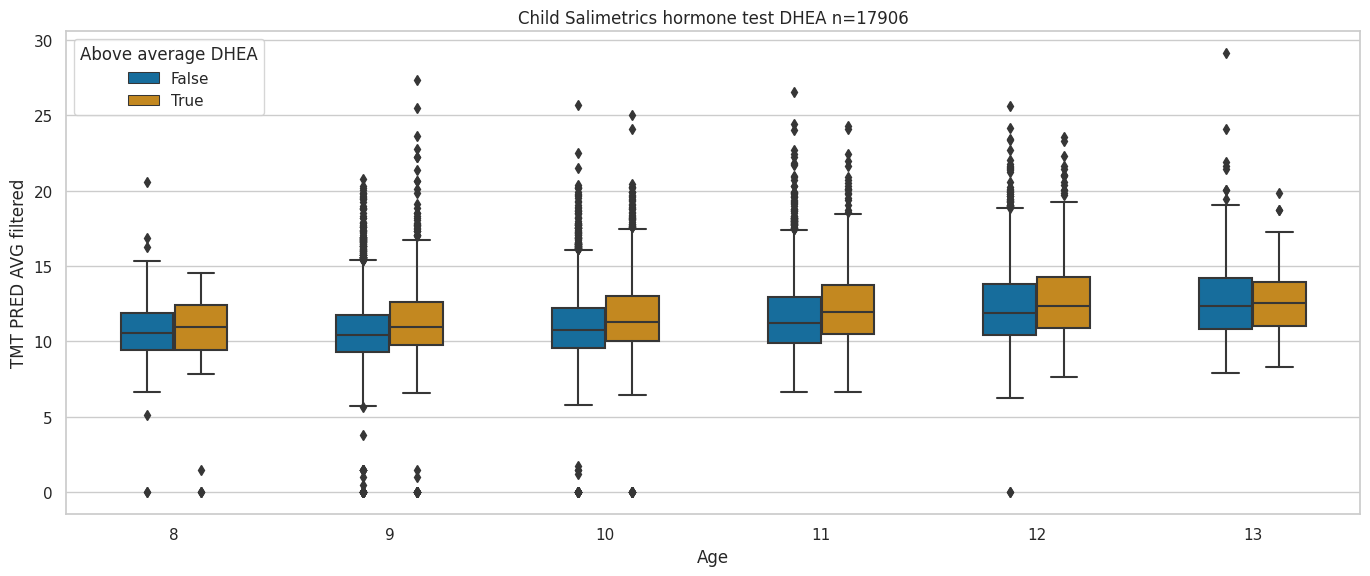

In [5]:
df_hrm['Above average DHEA'] = df_hrm['DHEA']>=df_hrm['DHEA'].mean()

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Above average DHEA", 
            data=df_hrm, palette="colorblind", width=0.5).set_title("Child Salimetrics hormone test DHEA n="+str(df_hrm.shape[0]))
plt.savefig('data/abcd_plots/DHEA.png', dpi=300)

Normals for the children https://emedicine.medscape.com/article/2088870-overview?reg=1

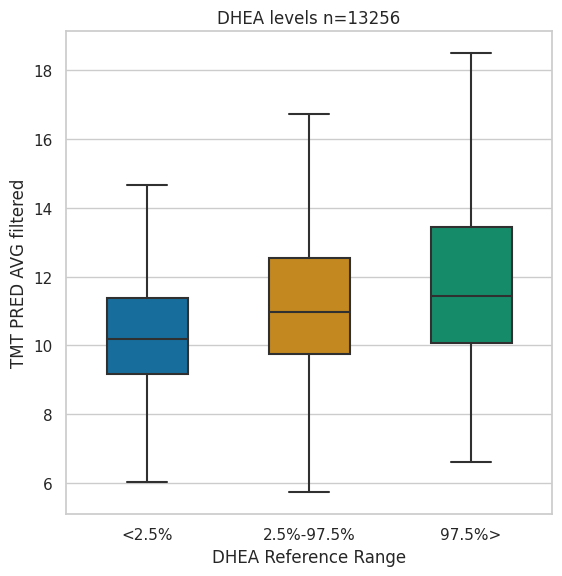

In [6]:
dict_dhea_norms = {
    1:
    {8:{'min':11,'max':120},
      9:{'min':11,'max':120},
      10:{'min':11,'max':120},
      11:{'min':14,'max':323},
      12:{'min':5.5,'max':(312+323)/2},
      13:{'min':5.5,'max':312}},
    
    2:
    {8:{'min':16,'max':96},
      9:{'min':16,'max':96},
      10:{'min':22,'max':184},
      11:{'min':11,'max':296},
      12:{'min':17,'max':343},
      13:{'min':(17+57)/2,'max':(343+395)/2}
      }
}

act_list2 = []
for idx in range(0, df_hrm.shape[0]):
    
    dhea = df_hrm.iloc[idx]['DHEA']
    gender =  df_hrm.iloc[idx]['gender']
    age = df_hrm.iloc[idx]['Age']
    first_q = dict_dhea_norms[gender][age]['min']
    third_q = dict_dhea_norms[gender][age]['max']
    #print(dhea,first_q,third_q)
    
    if first_q > dhea:
        act_list2.append('<2.5%')
    elif first_q < dhea < third_q:
        act_list2.append('2.5%-97.5%')
    elif dhea > third_q:
        act_list2.append('97.5%>')
    else:
        act_list2.append("No data")
        
df_hrm['DHEA Reference Range'] = act_list2
df_hrm = df_hrm[df_hrm['DHEA Reference Range'] != "No data"]
df_hrm['Sex'] = df_hrm['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="DHEA Reference Range", y="TMT PRED AVG filtered", #hue="HSE Quantiles",
            order=['<2.5%','2.5%-97.5%','97.5%>'], 
            data=df_hrm,
            showfliers=False,
            palette="colorblind",
            width=0.5).set_title("DHEA levels n="+str(df_hrm.shape[0]))
plt.savefig('data/abcd_plots/dhea_norms.png', dpi=300)

In [7]:
ref = df_hrm[df_hrm['DHEA Reference Range']=='2.5%-97.5%']['DHEA'].mean()
ref_25 = df_hrm[df_hrm['DHEA Reference Range']=='<2.5%']['DHEA'].mean()
ref_97 = df_hrm[df_hrm['DHEA Reference Range']=='97.5%>']['DHEA'].mean()
ref,ref_25,ref_97

(64.33815882661534, 10.28427346683354, 169.8556718137254)

In [46]:
from scipy.stats import permutation_test
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)
res = permutation_test((list(df_hrm[df_hrm['DHEA Reference Range']=='97.5%>']['DHEA']),
                       list(df_hrm[df_hrm['DHEA Reference Range']=='<2.5%']['DHEA'])), 
                       statistic, n_resamples=10000,
                       vectorized=True, alternative='less',
                       random_state=42)
res

PermutationTestResult(statistic=159.57139834689184, pvalue=1.0, null_distribution=array([-2.10148425,  7.20987772,  1.30962174, ...,  6.75659913,
       -0.56732097, -7.26017488]))

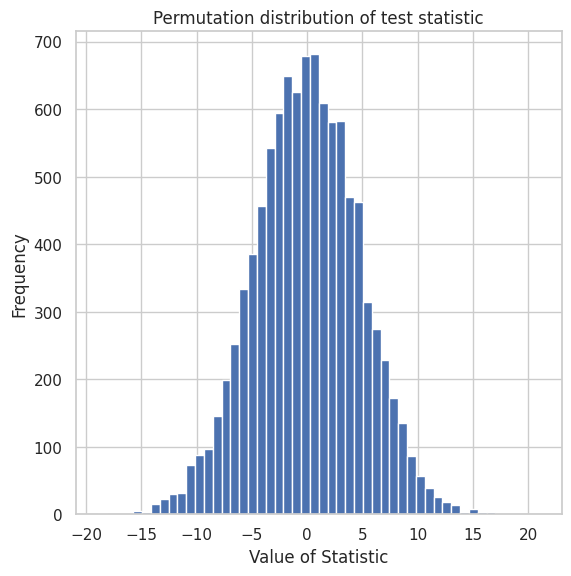

In [48]:
import matplotlib.pyplot as plt
plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df_hrm['DHEA Reference Range'].value_counts()

In [ ]:
import pandas as pd
from scipy.stats import chisquare

dict = {'2.5%-97.5%' : 0.95,
        '97.5%>': 0.025,
        '<2.5%' : .025}
   
# create series from dictionary
nullProbs = pd.Series(dict)
nullProbs
# make a frequency table for the observed data
observed = df_hrm['DHEA Reference Range'].value_counts()
print(observed)

# make a frequency table for our expected data, using the probabilities we specified above
expected = nullProbs * sum(observed)
print(expected)
# run the test
ans = chisquare(f_obs = observed, f_exp = expected)

# make the output easier to read
print("x2 = ", ans[0])
print("p = ", ans[1])
print(ans)
# p-value < 0.05  suggests that the null hypothesis is probably not true and provides guidance to reject
#the null hypothesis and accept the alternative hypothesis, i.e. that the groups probably differ.

# A p-value > 0.05 would be interpreted by many as “not statistically significant,” meaning that 
# there was insufficient evidence to reject the null hypothesis and conclude that the groups are different. 

Of the 13256 participants in the experiment, 11437 participants had DHEA within 2.5%-97.5%, 1020 had
75%>, and 799 had <25%. A chi-square goodness of fit test was conducted to test whether the probabilities of quantile were identical for all three quantiles (null hypothesis P(25%-75%)=0.5, P(75%>)=0.25, P(<25%)=0.25). The results were significant (x2(2)=6985.78, p = 0.0), suggesting that participants were not assigned to quantiles purely at random.

In [ ]:
# plot growth with one patient
# plot just baselines
# stat significance test
# try a couple in percentiles instead of TMT 

https://pediatric.testcatalog.org/show/EEST 

In [ ]:
df_hrm['Above average HSE'] = df_hrm['HSE']>=df_hrm['HSE'].mean()

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Above average HSE", data=df_hrm, 
            palette="colorblind", width=0.5).set_title("Child Salimetrics hormone test HSE n="+str(df_hrm.shape[0]))
plt.savefig('data/abcd_plots/HSE.png', dpi=300)

In [ ]:
dict_hse_norms = {
    1:
    {8:{'min':0,'max':13},
      9:{'min':0,'max':13},
      10:{'min':0,'max':14},
      11:{'min':0,'max':15},
      12:{'min':0,'max':16},
      13:{'min':0,'max':26}},
    
    2:
    {8:{'min':0,'max':20},
      9:{'min':0,'max':22},
      10:{'min':0,'max':24},
      11:{'min':0,'max':60},
      12:{'min':15,'max':85},
      13:{'min':15,'max':85}
      }
}

act_list2 = []
for idx in range(0, df_hrm.shape[0]):
    
    hse = df_hrm.iloc[idx]['HSE']
    gender =  df_hrm.iloc[idx]['gender']
    age = df_hrm.iloc[idx]['Age']
    #print(hse)
    first_q = dict_hse_norms[gender][age]['min']
    third_q = dict_hse_norms[gender][age]['max']

    if first_q > hse:
        act_list2.append('<25%')
    elif first_q < hse < third_q:
        act_list2.append('25%-75%')
    elif hse > third_q:
        act_list2.append('75%>')
    else:
        act_list2.append("No data")
        
df_hrm['HSE Quantiles'] = act_list2
df_hrm['Sex'] = df_hrm['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="HSE Quantiles", y="TMT PRED AVG filtered", #hue="HSE Quantiles",
            order=['<25%','25%-75%','75%>'], 
            data=df_hrm,
            showfliers = False,
            palette="colorblind",
            width=0.5).set_title("HSE levels n="+str(df_hrm.shape[0]))
plt.savefig('data/abcd_plots/hse_norms.png', dpi=300)

In [ ]:
df_hrm['Above average ERT'] = df_hrm['ERT']>=df_hrm['ERT'].mean()
#estradiol
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Above average ERT", data=df_hrm, palette="colorblind",
            showfliers = False,
            width=0.5).set_title("Child Salimetrics hormone test ERT n="+str(df_hrm.shape[0]))
plt.savefig('data/abcd_plots/ERT.png', dpi=300)

https://www.healthcare.uiowa.edu/path_handbook/handbook/test97.html

In [ ]:
#https://livhealth.com/testosterone-in-women-and-men/#:~:text=6%2D9%20years%20old%3A%20below,below%207%2D75%20ng%2Fdl
dict_ert_norms = {
    1:
    {8:{'min':7,'max':20},
      9:{'min':7,'max':(20+130)/2},
      10:{'min':7,'max':130},
      11:{'min':7,'max':(130+800)/2},
      12:{'min':7,'max':800},
      13:{'min':7,'max':800}},

    
    2:
    {8:{'min':7,'max':20},
      9:{'min':7,'max':(20+44)/2},
      10:{'min':7,'max':44},
      11:{'min':7,'max':(44+75)/2},
      12:{'min':7,'max':75},
      13:{'min':7,'max':75}
      }
}

act_list2 = []
for idx in range(0, df_hrm.shape[0]):
    
    ert = df_hrm.iloc[idx]['ERT']
    gender =  df_hrm.iloc[idx]['gender']
    age = df_hrm.iloc[idx]['Age']
    #print(hse)
    first_q = dict_ert_norms[gender][age]['min']
    third_q = dict_ert_norms[gender][age]['max']

    if first_q > ert:
        act_list2.append('<2.5%')
    elif third_q > ert > first_q:
        act_list2.append('2.5%-97.5%')
    elif ert > third_q:
        act_list2.append('97.5%>')
    else:
        act_list2.append("No data")
        
df_hrm['ERT Levels'] = act_list2
df_hrm['Sex'] = df_hrm['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x='ERT Levels', y="TMT PRED AVG filtered", #hue="HSE Quantiles",
            order=['<2.5%','2.5%-97.5%','97.5%>'], 
            data=df_hrm,
            showfliers = False,
            palette="colorblind",
            width=0.5).set_title("ERT(testosterone) levels n="+str(df_hrm.shape[0]))
plt.savefig('data/abcd_plots/hert_norms.png', dpi=300)

In [ ]:
import pandas as pd
from scipy.stats import chisquare

df_hrm = df_hrm[df_hrm['ERT Levels']!='No data']

dict = {'2.5%-97.5%' : .95,
        '97.5%>' : 0.025,
        '<2.5%': 0.025}
   
# create series from dictionary
nullProbs = pd.Series(dict)
nullProbs
# make a frequency table for the observed data
observed = df_hrm['ERT Levels'].value_counts()
print(observed)

# make a frequency table for our expected data, using the probabilities we specified above
expected = nullProbs * sum(observed)
print(expected)
# run the test
ans = chisquare(f_obs = observed, f_exp = expected)

print(ans)
# make the output easier to read
print("x2 = ", ans[0])
print("p = ", ans[1])
# if p<0.05 reject the null hypothesis

## 3. Race

In [ ]:
df_etnic = pd.read_csv("data/ABCD-studies/abcd_enticity.csv", header=0)

In [ ]:
plt.clf()
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Race", data=df_etnic, 
            showfliers = False,
            palette="colorblind", width=0.5).set_title("Race n="+str(df_etnic.shape[0]))

plt.savefig('data/abcd_plots/race_mem.png', dpi=300)

## 4. Household Income

note: this is also interesting: a lot of records show income <5k per year. That makes me think how that could be possible; so therefore maybe parents didn't want to disclose their financial situation and just clicked the first option in the questionnare? 

In [ ]:
df_etnic = pd.read_csv("data/ABCD-studies/abcdabcd_lpds01_income.csv", header=0)

In [ ]:
#1 = Less than $5,000 ; 
#2 = $5,000 through $11,999 ;
#3 = $12,000 through $15,999 ; 
#4 = $16,000 through $24,999 ; 
#5 = $25,000 through $34,999 ; 
#6 = $35,000 through $49,999 ; 
#7 = $50,000 through $74,999 ; 
#8 = $75,000 through $99,999 ; 
#9 = $100,000 through $199,999 ; 
#10 = $200,000 and greater ; 
# 999, Don't know ; 777, Refuse to answer
df_etnic['Income Above $50,000'] = (df_etnic['Age']>=7) & (df_etnic['Total house income']<=10)
     
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered",hue="Income Above $50,000", showfliers=False,
            data=df_etnic, palette="colorblind", width=0.5).set_title("Total house income n="+str(df_etnic.shape[0]))
plt.savefig('data/abcd_plots/income.png', dpi=300)

## 5. Activity levels: internat_physical_activ01

Note: foundsome mismatch between row names and row questions, so data might be not reliable. I don't see a lot of infomation on these plots and I think that the relationship is non-linear between physical activity levels and the TMT (eg its probably also depends on the nutrition status and genes)

In [ ]:
df_phys = pd.read_csv("data/ABCD-studies/internat_physical_activ01.csv", header=0)
df_phys

## 6. BMI vs TMT: abcd_ant01

note: this one looks great! 

In [ ]:
df_ant = pd.read_csv("data/ABCD-studies/abcd_bmi.csv", header=0)
#df_ant_w_estimate.to_csv(path_or_buf= "data/ABCD-studies/abcd_bmi_w_estimate.csv")

In [ ]:
df_ant

In [ ]:
first_q = df_ant['BMI'].quantile([.25, .5, .75])[0.25]
mean_q = df_ant['BMI'].quantile([.25, .5, .75])[0.5]
third_q = df_ant['BMI'].quantile([.25, .5, .75])[0.75]

act_list2 = []
for idx in range(0, df_ant.shape[0]):
    row = df_ant.iloc[idx]['BMI']
    if first_q > row:
        act_list2.append('<25%, '+str(round(first_q,2)))
    elif mean_q > row > first_q:
        act_list2.append('25%-50%, '+ str(round(first_q,2)) + "-"+ str(round(mean_q,2)))
    elif third_q > row > mean_q:
        act_list2.append('50%-75%, '+ str(round(mean_q,2)) + "-"+ str(round(third_q,2)))
    elif row > third_q:
        act_list2.append('75%>, '+ str(round(third_q,2)))
    else:
        act_list2.append("No data")
        
df_ant['BMI Quantiles'] = act_list2

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="BMI Quantiles",
            hue_order=['<25%, '+ str(round(first_q,2)),
                       '25%-50%, '+ str(round(first_q,2)) + "-"+ str(round(mean_q,2)),
                       '50%-75%, '+ str(round(mean_q,2)) + "-"+ str(round(third_q,2)),
                       '75%>, '+ str(round(third_q,2))], 
            data=df_ant, palette="colorblind", width=0.5).set_title("BMI level n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/bmi.png', dpi=300)

BMI norms according to CDC charts https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html / the bmigerev.xsl file

In [ ]:
dict_bmi_norms = {
    1:
    {8:{'min':14.9,'max':17.3},
      9:{'min':15.3,'max':17.9},
      10:{'min':15.7,'max':18.6},
      11:{'min':16.2,'max':19.3},
      12:{'min':16.7,'max':20.0},
      13:{'min':17.3,'max':20.8}},
    
    2:
    {8:{'min':14.9,'max':17.6},
      9:{'min':15.3,'max':18.3},
      10:{'min':15.7,'max':19.0},
      11:{'min':16.2,'max':19.8},
      12:{'min':16.8,'max':20.6},
      13:{'min':17.3,'max':21.3}
      }
}

act_list2 = []
for idx in range(0, df_ant.shape[0]):
    bmi = df_ant.iloc[idx]['BMI']
    gender =  df_ant.iloc[idx]['gender']
    age = df_ant.iloc[idx]['Age']
    
    first_q = dict_bmi_norms[gender][age]['min']
    third_q = dict_bmi_norms[gender][age]['max']

    if first_q > bmi:
        act_list2.append('<25%')
    elif third_q > bmi > first_q:
        act_list2.append('25%-75%')
    elif bmi > third_q:
        act_list2.append('75%>')
    else:
        act_list2.append("No data")
        
df_ant['BMI Quantiles'] = act_list2
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="BMI Quantiles",
            hue_order=['<25%','25%-75%','75%>'], 
            data=df_ant,
            palette="colorblind",
            width=0.5).set_title("BMI levels n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/bmi.png', dpi=300)

In [ ]:
sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="BMI Quantiles", y="TMT PRED AVG filtered", #hue="BMI Quantiles",
            order=['<25%','25%-75%','75%>'], 
            data=df_ant,
            palette="colorblind",
            showfliers = False,
            width=0.5).set_title("BMI levels n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/bmi_no_age.png', dpi=300)

In [ ]:
import pandas as pd
from scipy.stats import chisquare

df_ant = df_ant[df_ant['BMI Quantiles']!='No data']

dict = {'75%>' : 0.25,
    '25%-75%' : .5,
        '<25%': 0.25}
   
# create series from dictionary
nullProbs = pd.Series(dict)
nullProbs
# make a frequency table for the observed data
observed = df_ant['BMI Quantiles'].value_counts()
print(observed)

# make a frequency table for our expected data, using the probabilities we specified above
expected = nullProbs * sum(observed)
print(expected)
# run the test
ans = chisquare(f_obs = observed, f_exp = expected)

print(ans)
# make the output easier to read
print("x2 = ", ans[0])
print("p = ", ans[1])
# if p<0.05 reject the null hypothesis

In [ ]:
#https://childrenswi.org/medical-care/adolescent-health-and-medicine/issues-and-concerns/adolescent-growth-and-development/normal-growth
dict_height_norms = {
    1:
    {8:{'min':47,'max':54},
      9:{'min':47,'max':54},
      10:{'min':50,'max':59},
      11:{'min':50,'max':59},
      12:{'min':54,'max':64},
      13:{'min':54,'max':64}},
    
    2:
    {8:{'min':47,'max':54},
      9:{'min':47,'max':54},
      10:{'min':50,'max':59},
      11:{'min':50,'max':59},
      12:{'min':55,'max':64},
      13:{'min':55,'max':64}
      }
}

act_list2 = []
for idx in range(0, df_ant.shape[0]):
    height = df_ant.iloc[idx]['Height']
    gender =  df_ant.iloc[idx]['gender']
    age = df_ant.iloc[idx]['Age']
    
    first_q = dict_height_norms[gender][age]['min']
    third_q = dict_height_norms[gender][age]['max']

    if first_q > height:
        act_list2.append('Low')
    elif first_q < height < third_q:
        act_list2.append('Median')
    elif height > third_q:
        act_list2.append('High')
    else:
        act_list2.append("No data")
        
df_ant['Height Levels'] = act_list2
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Height Levels", y="TMT PRED AVG filtered",
            order=['Low','Median','High'], 
            data=df_ant,
            showfliers = False,
            palette="colorblind",
            width=0.5).set_title("Height levels n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/height_lelevs.png', dpi=300)

In [ ]:
import pandas as pd
from scipy.stats import chisquare

df_ant = df_ant[df_ant['Height Levels']!='No data']

dict = {'Low' : .025,
        'Median' : 0.95,
        'High': 0.025}
   
# create series from dictionary
nullProbs = pd.Series(dict)
nullProbs
# make a frequency table for the observed data
observed = df_ant['Height Levels'].value_counts()
print(observed)

# make a frequency table for our expected data, using the probabilities we specified above
expected = nullProbs * sum(observed)

# run the test
ans = chisquare(f_obs = observed, f_exp = expected)

print(ans)
# make the output easier to read
print("x2 = ", ans[0])
print("p = ", ans[1])
# if p<0.05 reject the null hypothesis

In [ ]:
first_q = df_ant['Height'].quantile([.25, .5, .75])[0.25]
mean_q = df_ant['Height'].quantile([.25, .5, .75])[0.5]
third_q = df_ant['Height'].quantile([.25, .5, .75])[0.75]

act_list2 = []
for idx in range(0, df_ant.shape[0]):
    row = df_ant.iloc[idx]['Height']
    if first_q > row:
        act_list2.append('<25%, '+str(round(first_q,2)))
    elif mean_q > row > first_q:
        act_list2.append('25%-50%, '+ str(round(first_q,2)) + "-"+ str(round(mean_q,2)))
    elif third_q > row > mean_q:
        act_list2.append('50%-75%, '+ str(round(mean_q,2)) + "-"+ str(round(third_q,2)))
    elif row > third_q:
        act_list2.append('75%>, '+ str(round(third_q,2)))
    else:
        act_list2.append("No data")
        
df_ant['Height Quantiles'] = act_list2

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Height Quantiles",
            hue_order=['<25%, '+ str(round(first_q,2)),
                       '25%-50%, '+ str(round(first_q,2)) + "-"+ str(round(mean_q,2)),
                       '50%-75%, '+ str(round(mean_q,2)) + "-"+ str(round(third_q,2)),
                       '75%>, '+ str(round(third_q,2))], 
            data=df_ant, palette="colorblind", width=0.5).set_title("Height quantiles n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/height_quantile.png', dpi=300)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_ant['TMT PRED AVG filtered'], df_ant['BMI'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import pearsonr
corr, _ = pearsonr(df_ant['TMT PRED AVG filtered'], df_ant['BMI'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
corr, _ = spearmanr(df_ant['TMT PRED AVG filtered'], df_ant['BMI'])
print('Spearmans correlation: %.3f' % corr)

### Height-adjusted TMT and bmi-adjusted TMT 

In [ ]:
df_ant = pd.read_csv("data/ABCD-studies/abcd_bmi.csv", header=0)

In [ ]:
df_ant_w_estimate = pd.read_csv("data/ABCD-studies/abcd_bmi_w_estimate.csv", header=0)
df_ant_w_estimate

In [ ]:
df_ant['TMT-BMI adj'] = df_ant["TMT PRED AVG filtered"]/df_ant['BMI']
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

#df_ant = df_ant[df_ant['TMT-BMI adj']<2.5]
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Age", y="TMT-BMI adj",hue='Sex',showfliers=False,
            data=df_ant, palette="colorblind", width=0.5,).set_title("TMT BMI-adjusted n="+str(df_ant.shape[0]))
#plt.savefig('data/abcd_plots/tmt-bmi.png', dpi=300)

In [ ]:
df_ant['TMT-Height adj'] = df_ant["TMT PRED AVG filtered"]/df_ant['Height']
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")


#df_ant = df_ant[df_ant['TMT-BMI adj']<2.5]
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Age", y="TMT-Height adj",hue='Sex', showfliers=False,
            data=df_ant, palette="colorblind", width=0.5).set_title("TMT Height-adjusted n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/tmt-height.png', dpi=300)

In [ ]:
df_ant[df_ant['TMT-BMI adj']>1.]

## 7. Steps activity levels abcd_fbwpas01

note: same story as activity levels; I think the relationship is much more complicated here

In [ ]:
df_step = pd.read_csv("data/ABCD-studies/abcd_steps.csv", header=0)

first_q = round(df_step['Total steps'].quantile([.25, .5, .75])[0.25],0)
mean_q = round(df_step['Total steps'].quantile([.25, .5, .75])[0.5],0)
third_q = round(df_step['Total steps'].quantile([.25, .5, .75])[0.75],0)

act_list2 =[]
for idx in range(0, df_step.shape[0]):
    row = df_step.iloc[idx]['Total steps']
    if first_q > row:
        act_list2.append('<25%, '+str(round(first_q,0)))
    elif mean_q > row > first_q:
        act_list2.append('25%-50%, '+ str(round(first_q,0)) + "-"+ str(round(mean_q,0)))
    elif third_q > row > mean_q:
        act_list2.append('50%-75%, '+ str(round(mean_q,0)) + "-"+ str(round(third_q,0)))
    elif row > third_q:
        act_list2.append('75%>, '+ str(round(third_q,0)))
    else:
        act_list2.append("No data")
        
df_step['Total steps Quantiles'] = act_list2

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Total steps Quantiles",
            hue_order=['<25%, '+ str(round(first_q,0)),
                       '25%-50%, '+ str(round(first_q,0)) + "-"+ str(round(mean_q,0)),
                       '50%-75%, '+ str(round(mean_q,0)) + "-"+ str(round(third_q,0)),
                       '75%>, '+ str(round(third_q,0))], 
            data=df_step, palette="colorblind", width=0.5).set_title("Total step level quantiles n="+str(df_step.shape[0]))
plt.savefig('data/abcd_plots/step_quantiles.png', dpi=300)


Boys to average 12,000 to 16,000 steps/day and girls to average 10,000 to 13,000 steps/day;  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3166269/
acc to
https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79 norm is between 7100-11000 steps/day


In [ ]:
df_step = pd.read_csv("data/ABCD-studies/abcd_steps.csv", header=0)

df_step['Sex'] = df_step['Gender'].map({2:'Female',1:'Male'})

healthy_male_lower =  7100#12000
healthy_male_higher = 11000#16000

healthy_female_lower = 7100#10000
healthy_female_higher = 11000#13000

steps_list =[]
for idx in range(0, df_step.shape[0]):
    row = df_step.iloc[idx]['Total steps']
    gender = df_step.iloc[idx]['Gender']
    
    if healthy_male_lower > row and gender==1:
        steps_list.append('Low steps')
    elif healthy_male_lower < row < healthy_male_higher and gender==1: 
        steps_list.append('Normal steps')
    elif row > healthy_male_higher and gender==1:
        steps_list.append('High steps')
        
    elif healthy_female_lower > row and gender==2:
        steps_list.append('Low steps')
    elif healthy_female_lower < row < healthy_female_higher and gender==2: 
        steps_list.append('Normal steps')
    elif row > healthy_female_higher and gender==2:
        steps_list.append('High steps')
        
    else:
        steps_list.append("No data")
        
df_step['Step levels'] = steps_list

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Sex",
            y="TMT PRED AVG filtered",
            hue='Step levels',
            showfliers = False,
            hue_order=['Low steps','Normal steps','High steps'], 
            data=df_step, palette="colorblind", width=0.5).set_title("Step levels n="+str(df_step.shape[0]))
plt.savefig('data/abcd_plots/dt_steps_levels1.png', dpi=300)



In [ ]:

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x='Step levels',
            y="TMT PRED AVG filtered",
            #hue='Step levels',
            showfliers = False,
            order=['Low steps','Normal steps','High steps'], 
            data=df_step, palette="colorblind", width=0.5).set_title("Step levels n="+str(df_step.shape[0]))
plt.savefig('data/abcd_plots/dt_steps_levels2.png', dpi=300)


## 8. Calorical Intake (abcd_bkfs01)

note: also has data for 3 year visit, for simplicity just 2year visit; cannot find in the dicts what GI and GL stands for

In [ ]:
df_cals = pd.read_csv("data/ABCD-studies/abcd_cals.csv", header=0)

In [ ]:
mean_cal=str(round(df_cals['Dt_kcal'].mean(),2))
df_cals["Above average Dt_kcal level, mean="+mean_cal+" kcal"] = df_cals['Dt_kcal']>=df_cals['Dt_kcal'].mean()

sns.set(rc={'figure.figsize':(12.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Above average Dt_kcal level, mean="+mean_cal+" kcal", 
            data=df_cals, 
            palette="colorblind", width=0.5).set_title("Child Dt_kcal level n="+str(df_cals.shape[0]))
plt.savefig('data/abcd_plots/dt_kal.png', dpi=300)


According to dietary reccomendations, healthy child kcal/d intake for range 9-13 years Female 1600 kcal/d, Male 1800 kcal/d https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/nutrition-basics/dietary-recommendations-for-healthy-children
https://www.healthychildren.org/English/healthy-living/nutrition/Pages/Energy-In-Recommended-Food-Drink-Amounts-for-Children.aspx

But it also depends on the activity levels

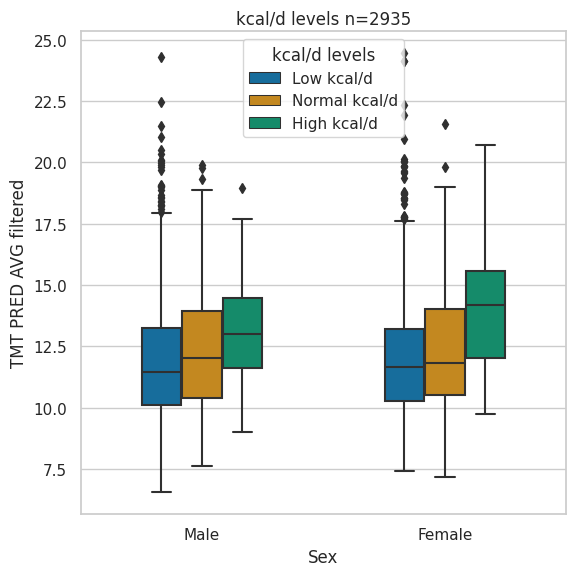

In [49]:
df_cals = pd.read_csv("data/ABCD-studies/abcd_cals.csv", header=0)
df_cals['Sex'] = df_cals['Gender'].map({2:'Female',1:'Male'})


healthy_male_lower = 1600
healthy_male_higher = 2600

healthy_female_lower = 1400
healthy_female_higher = 2200

cals_list =[]
for idx in range(0, df_cals.shape[0]):
    row = df_cals.iloc[idx]['Dt_kcal']
    gender = df_cals.iloc[idx]['Gender']
    
    if healthy_male_lower > row and gender==1:
        cals_list.append('Low kcal/d')
    elif healthy_male_lower < row < healthy_male_higher and gender==1: 
        cals_list.append('Normal kcal/d')
    elif row > healthy_male_higher and gender==1:
        cals_list.append('High kcal/d')
        
    elif healthy_female_lower > row and gender==2:
        cals_list.append('Low kcal/d')
    elif healthy_female_lower < row < healthy_female_higher and gender==2: 
        cals_list.append('Normal kcal/d')
    elif row > healthy_female_higher and gender==2:
        cals_list.append('High kcal/d')
        
    else:
        cals_list.append("No data")
        
df_cals['kcal/d levels'] = cals_list

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Sex",
            y="TMT PRED AVG filtered",
            hue='kcal/d levels',
            hue_order=['Low kcal/d','Normal kcal/d','High kcal/d'], 
            data=df_cals, palette="colorblind", width=0.5).set_title("kcal/d levels n="+str(df_cals.shape[0]))
plt.savefig('data/abcd_plots/dt_cals_levels.png', dpi=300)


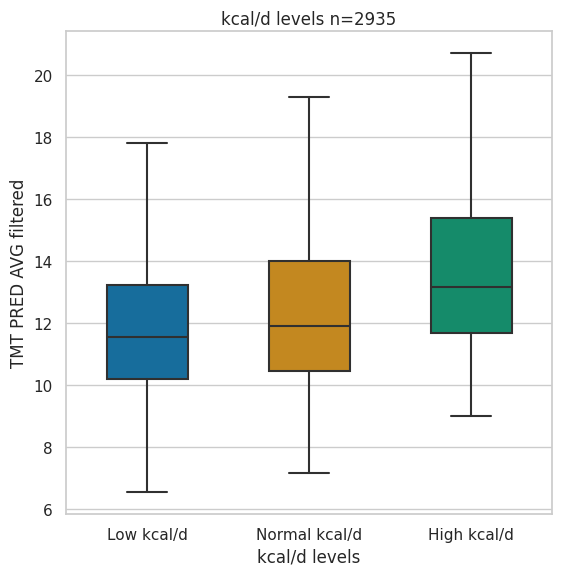

In [50]:
sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x='kcal/d levels',
            y="TMT PRED AVG filtered",
            #hue='kcal/d levels',
            showfliers=False,
            order=['Low kcal/d','Normal kcal/d','High kcal/d'], 
            data=df_cals, palette="colorblind", width=0.5).set_title("kcal/d levels n="+str(df_cals.shape[0]))
plt.savefig('data/abcd_plots/dt_cals_levels2.png', dpi=300)


In [57]:
from scipy.stats import permutation_test
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)
res = permutation_test((list(df_cals[df_cals['kcal/d levels']=='Low kcal/d']['Dt_kcal']),
                       list(df_cals[df_cals['kcal/d levels']=='High kcal/d']['Dt_kcal'])), 
                       statistic, n_resamples=10000,
                       vectorized=True, alternative='less',
                       random_state=42)
res.pvalue
#Since p-value < alpha, we can reject the null hypothesis that the two samples come from the same distribution.

9.999000099990002e-05

In [55]:
from scipy.stats import ttest_ind
res_asymptotic = ttest_ind(list(df_cals[df_cals['kcal/d levels']=='Low kcal/d']['Dt_kcal']),
                       list(df_cals[df_cals['kcal/d levels']=='High kcal/d']['Dt_kcal']),
                           alternative='less')
print(res_asymptotic.pvalue)

6.493597159999215e-302


In [ ]:
import pandas as pd
from scipy.stats import chisquare

df_cals = df_cals[df_cals['kcal/d levels']!='No data']

dict = {'Low kcal/d' : .025,
        'Normal kcal/d' : 0.95,
        'High kcal/d': 0.025}
   
# create series from dictionary
nullProbs = pd.Series(dict)
nullProbs
# make a frequency table for the observed data
observed = df_cals['kcal/d levels'].value_counts()
print(observed)

# make a frequency table for our expected data, using the probabilities we specified above
expected = nullProbs * sum(observed)
print(expected)

# run the test
ans = chisquare(f_obs = observed, f_exp = expected)

print(ans)
# make the output easier to read
print("x2 = ", ans[0])
print("p = ", ans[1])
# if p<0.05 reject the null hypothesis

## 9. Blood Hemoglobin and Cholesterol abcd_ybd01

In [ ]:
df_blood = pd.read_csv("data/ABCD-studies/abcd_blood.csv", header=0)
df_blood

df_blood["Above average Cholesterol level, mean="+str(round(df_blood['Cholesterol'].mean(),2))] = df_blood['Cholesterol']>=df_blood['Cholesterol'].mean()

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Above average Cholesterol level, mean="+str(round(df_blood['Cholesterol'].mean(),2)), data=df_blood, 
            palette="colorblind", width=0.5).set_title("Child Cholesterol level n="+str(df_blood.shape[0]))
plt.savefig('data/abcd_plots/dt_cholester.png', dpi=300)

HDL Cholesterol in healthy kids younger <18 should be more than 45 mg/dl; non-HDL <120mg/dL https://medlineplus.gov/highcholesterolinchildrenandteens.html

In [ ]:
df_blood = pd.read_csv("data/ABCD-studies/abcd_blood.csv", header=0)
df_blood

df_blood["Above normal non-HDL Cholesterol level, 120mg/dL>"] = df_blood['Cholesterol']>=120

sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Above normal non-HDL Cholesterol level, 120mg/dL>",
            y="TMT PRED AVG filtered",# hue="Above normal non-HDL Cholesterol level, 120mg/dL>",
            data=df_blood, 
            showfliers = False,
            palette="colorblind", width=0.5).set_title("Child non-HDL Cholesterol level n="+str(df_blood.shape[0]))
plt.savefig('data/abcd_plots/dt_cholester_dm.png', dpi=300)

In [ ]:
df_blood = pd.read_csv("data/ABCD-studies/abcd_blood.csv", header=0)
df_blood

df_blood["Below normal HDL Cholesterol level, <45/dL"] = df_blood['HDL Cholesterol']<=45

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Below normal HDL Cholesterol level, <45/dL", data=df_blood, 
            palette="colorblind", width=0.5).set_title("Child HDL Cholesterol level n="+str(df_blood.shape[0]))
plt.savefig('data/abcd_plots/dt_cholester_dm_hdl.png', dpi=300)

According to medscape, avg hemoglobin levels in kids 6-18 years: 10-15.5 g/dL
https://emedicine.medscape.com/article/2085614-overview#:~:text=6%20months%2D1%20year%3A%209.5,%3A%2010%2D15.5%20g%2FdL

In [ ]:
mean_hb_lower = 10
mean_hb_higher = 15.5
df_blood["Above average Hemoglobin level, mean="+str(round(df_blood['Hemoglobin'].mean(),2))] = df_blood['Hemoglobin']>=df_blood['Hemoglobin'].mean()

sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Above average Hemoglobin level, mean="+str(round(df_blood['Hemoglobin'].mean(),2)),
            data=df_blood,
            palette="colorblind", width=0.5).set_title("Child Hemoglobin level n="+str(df_blood.shape[0]))
plt.savefig('data/abcd_plots/dt_hemoglobin.png', dpi=300)

In [ ]:
df_blood = pd.read_csv("data/ABCD-studies/abcd_blood.csv", header=0)

first_q = 10.0
third_q = 15.5

hb_list =[]
for idx in range(0, df_blood.shape[0]):
    row = df_blood.iloc[idx]['Hemoglobin']
    #print(row)
    if first_q > row:
        hb_list.append('<10 g/dL')
    elif first_q < row< third_q: 
        hb_list.append('10-15.5 g/dL')
    elif row > third_q:
        hb_list.append('15.5 g/dL>')
    else:
        hb_list.append("No data")
        
df_blood['Hb levels'] = hb_list
df_blood = df_blood[df_blood['Hb levels']!='No data']
sns.set(rc={'figure.figsize':(6.27,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

sns.boxplot(x="Hb levels",
            y="TMT PRED AVG filtered",
            
            showfliers = False,
            #hue="Hb levels",
            order=['<10 g/dL',
                       '10-15.5 g/dL',
                       '15.5 g/dL>'], 
            data=df_blood, palette="colorblind", width=0.5).set_title("Hemoglobin levels n="+str(df_blood.shape[0]))
plt.savefig('data/abcd_plots/dt_hemoglobin_levels.png', dpi=300)


In [ ]:
import pandas as pd
from scipy.stats import chisquare

dict = {'10-15.5 g/dL' : 0.982,
        '15.5 g/dL>': 0.014,
        '<10 g/dL' : .004}
   
# create series from dictionary
nullProbs = pd.Series(dict)
nullProbs
# make a frequency table for the observed data
observed = df_blood['Hb levels'].value_counts()
print(observed)

# make a frequency table for our expected data, using the probabilities we specified above
expected = nullProbs * sum(observed)
print(expected)
# run the test
ans = chisquare(f_obs = observed, f_exp = expected)

# make the output easier to read
print("x2 = ", ans[0])
print("p = ", ans[1])
# p-value < 0.05 "statistically significant"
# suggests that the null hypothesis is probably not true and provides guidance to reject
#the null hypothesis and accept the alternative hypothesis, i.e. that the groups probably differ.

# A p-value > 0.05 would be interpreted by many as “not statistically significant,” meaning that 
# there was insufficient evidence to reject the null hypothesis and conclude that the groups are different. 

## Head CRM

In [ ]:
input_annotation_file = 'data/dataset_measured_heads_filtered.csv'
df_crm = pd.read_csv(input_annotation_file, header=0,)
df_crm['Adjusted TMT by head crm'] = df_crm['TMT PRED AVG filtered']/df_crm['perimeter_opencv']
df_crm=df_crm[df_crm["Age"]<35]

In [ ]:
#plot general
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
df_crm['Sex'] =df_crm['Gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Age", y="Adjusted TMT by head crm", hue="Sex", data=df_crm, showfliers=False,
            palette="colorblind", width=0.5).set_title("Adjusted TMT by head crm n="+str(df_crm.shape[0]))
plt.savefig('data/abcd_plots/crm.png', dpi=300)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_crm['TMT PRED AVG filtered'], df_crm['perimeter_opencv'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
corr, _ = spearmanr(df_crm['TMT PRED AVG filtered'], df_crm['perimeter_opencv'])
print('Spearmans correlation: %.3f' % corr)

In [ ]:
#plot general
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
df_crm['Sex'] = df_crm['Gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Age", y="perimeter_opencv", hue="Sex", data=df_crm, showfliers=False,
            palette="colorblind", width=0.5).set_title("Head perimeter (opencv) n="+str(df_crm.shape[0]))
plt.savefig('data/abcd_plots/perimeter_opencv.png', dpi=300)